In [47]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
link = "https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newDeaths28DaysByDeathDate&format=csv"
f = requests.get(link)

with open("uk_deaths.csv","w+") as out:
    out.seek(0)
    out.write(f.text)
    out.truncate()
data = pd.read_csv("uk_deaths.csv")
data.dropna()#There are nan values in feb before deaths started and yesterday where reporting isn't complete
data=data[::-1].reset_index()#Results are indexed backwards in time
data["rolling_deaths"]=data["newDeaths28DaysByDeathDate"].rolling(7).mean()

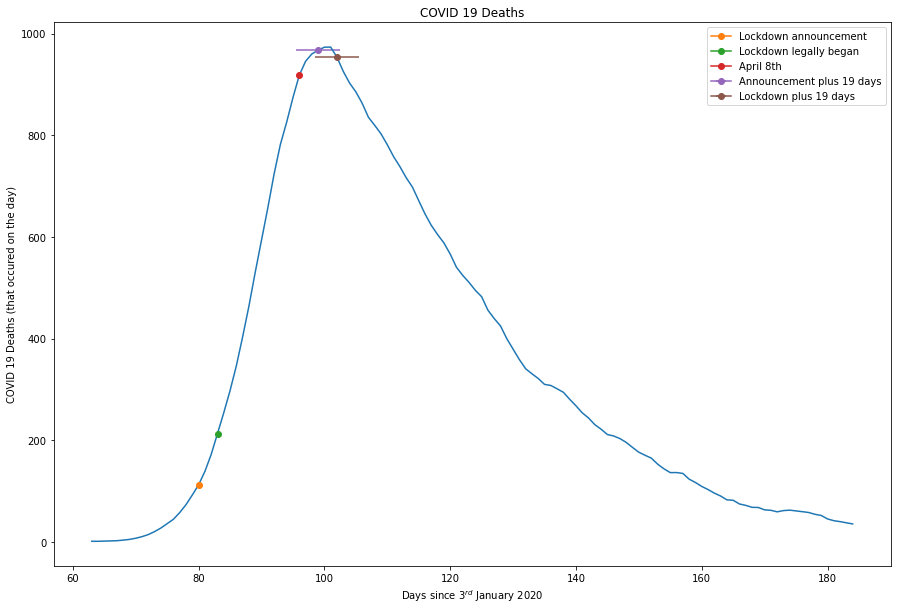

In [99]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(data["rolling_deaths"][:-150])

plt.plot(data.loc[data['date'] == "2020-03-23"]["rolling_deaths"],marker='o',label="Lockdown announcement")
plt.plot(data.loc[data['date'] == "2020-03-26"]["rolling_deaths"],marker='o',label="Lockdown legally began")

plt.plot(data.loc[data['date'] == "2020-04-08"]["rolling_deaths"],marker='o',label="April 8th")

plt.errorbar(data.index[data['date'] == "2020-04-11"],data.loc[data['date'] == "2020-04-11"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Announcement plus 19 days")
plt.errorbar(data.index[data['date'] == "2020-04-14"],data.loc[data['date'] == "2020-04-14"]["rolling_deaths"].values[0], xerr=3.5,marker="o",label="Lockdown plus 19 days")

plt.xlabel("Days since 3$^{rd}$ January 2020")
plt.ylabel("COVID 19 Deaths (that occured on the day)")
plt.title("COVID 19 Deaths")

plt.legend()

Int64Index([99], dtype='int64')